# E07. 인물 사진 만들기

(725, 600, 3)


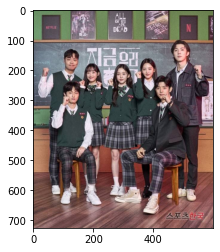

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

img_path = os.getenv('HOME')+'/aiffel/E07/human_segmentation/images/school.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [2]:
model_dir = os.getenv('HOME')+'/aiffel/E07/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/E07/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fe7d7899070>)

In [3]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [4]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [5]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

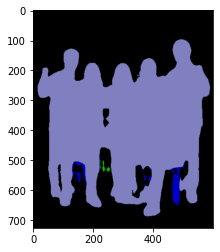

In [6]:
plt.imshow(output)
plt.show()

In [7]:
segvalues

{'class_ids': array([ 0,  9, 15, 18]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [8]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person
sofa


In [9]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [10]:
colormap[15]

array([192, 128, 128])

In [11]:
seg_color = (128,128,192)

(725, 600)


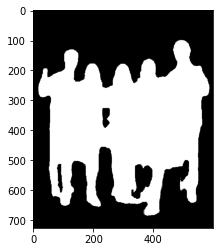

In [12]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

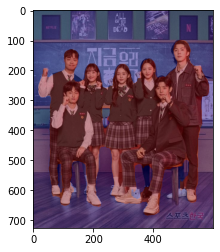

In [13]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

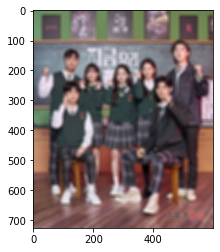

In [14]:
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

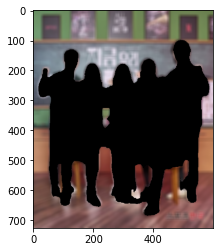

In [15]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

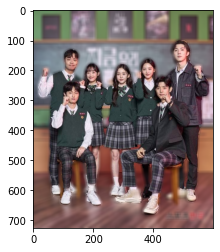

In [16]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(1350, 900, 3)


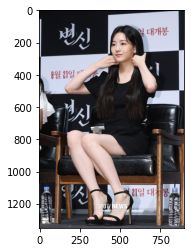

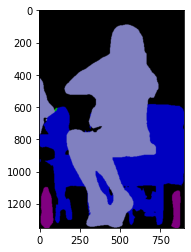

In [17]:
img_path2 = os.getenv('HOME')+'/aiffel/E07/human_segmentation/images/person1.jpg'  
img_orig2 = cv2.imread(img_path2) 

print(img_orig2.shape)
plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
plt.show()

segvalues2, output2 = model.segmentAsPascalvoc(img_path2)

plt.imshow(output2)
plt.show()

(1350, 900)


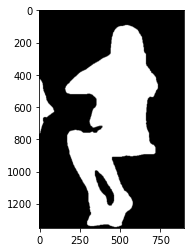

In [18]:
seg_map = np.all(output2==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

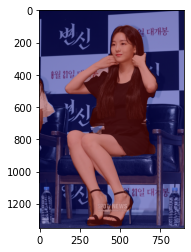

In [19]:
img_show = img_orig2.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

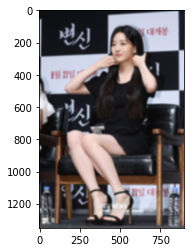

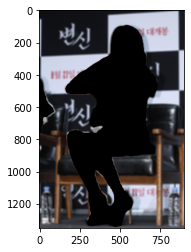

In [20]:
img_orig_blur2 = cv2.blur(img_orig2, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur2, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur2 = cv2.bitwise_and(img_orig_blur2, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))
plt.show()

(3000, 5000, 3)


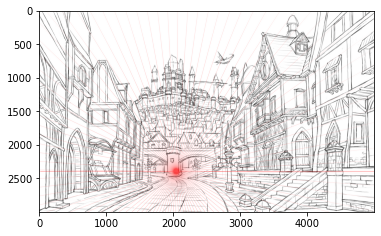

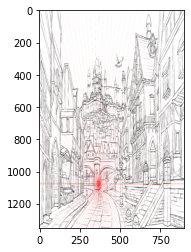

In [21]:
img_path_back = os.getenv('HOME')+'/aiffel/E07/human_segmentation/images/background.jfif'
img_back = cv2.imread(img_path_back)

print(img_back.shape)
plt.imshow(cv2.cvtColor(img_back, cv2.COLOR_BGR2RGB))
plt.show()

resize_back = cv2.resize(img_back, (900, 1350))

plt.imshow(cv2.cvtColor(resize_back, cv2.COLOR_BGR2RGB))
plt.show()

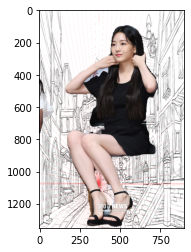

In [22]:
img_concat2 = np.where(img_mask_color==255, img_orig2, resize_back)
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()

(547, 813, 3)


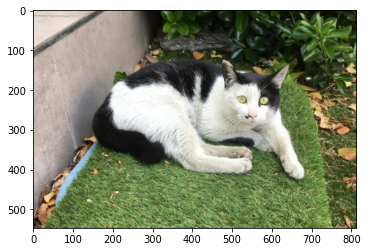

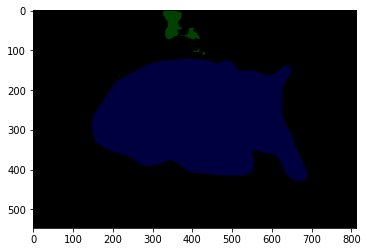

In [23]:
img_path3 = os.getenv('HOME')+'/aiffel/E07/human_segmentation/images/cat.jpg'  
img_orig3 = cv2.imread(img_path3) 

print(img_orig3.shape)
plt.imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))
plt.show()

segvalues3, output3 = model.segmentAsPascalvoc(img_path3)

plt.imshow(output3)
plt.show()

In [24]:
for class_id in segvalues3['class_ids']:
    print(LABEL_NAMES[class_id])
    
colormap[8]

background
cat
pottedplant


array([64,  0,  0])

In [25]:
seg_color2 = (0, 0, 64)

(547, 813)


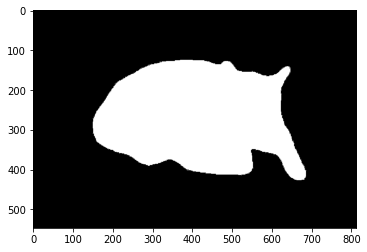

In [26]:
seg_map = np.all(output3==seg_color2, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

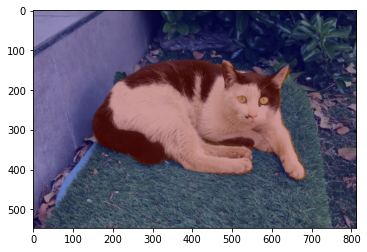

In [27]:
img_show = img_orig3.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

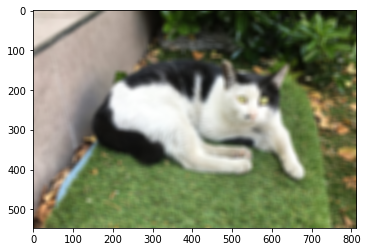

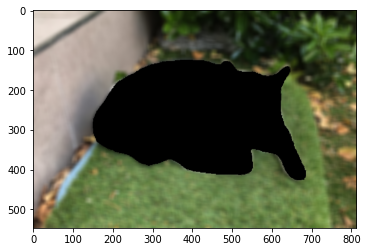

In [28]:
img_orig_blur3 = cv2.blur(img_orig3, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur3, cv2.COLOR_BGR2RGB))
plt.show()

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur3 = cv2.bitwise_and(img_orig_blur3, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur3, cv2.COLOR_BGR2RGB))
plt.show()

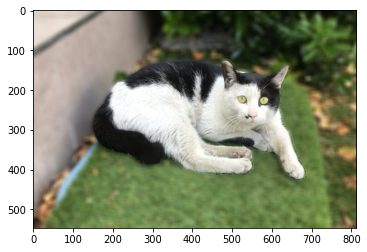

In [29]:
img_concat3 = np.where(img_mask_color==255, img_orig3, img_bg_blur3)
plt.imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGR2RGB))
plt.show()

In [30]:
img_path_save = os.getenv('HOME')+'/aiffel/E07/human_segmentation/images'

result1 = cv2.imwrite(img_path_save+'/result1.jpg', img_concat)
result2 = cv2.imwrite(img_path_save+'/result2.jpg', img_concat2)
result3 = cv2.imwrite(img_path_save+'/result3.jpg', img_concat3)

## 문제점 분석

![](./result1_school_desc.jpg)
![](./result2_cyh_desc.jpg)
![](./result3_cat_desc.jpg)

## 솔루션 제안하기

### 사전조사
**노드에서 제시된 내용들을 살펴보니 결국 피사체를 더욱 정확하게 인식해야 한 이미지 안에서 각기 다른 물체를 효과적으로 구분할 수 있고, 광량조절(조리개 조절) 등과 같은 물리적(?) 촬영기법을 사용하지 않고 shallow focus를 활용하기 위해서는 렌즈와 피사체, 그리고 배경과의 거리가 중요해보였다. 결국 물체와의, 혹은 물체 간의 거리를 측정하는 기술이 가장 필요할 것이라고 생각했고, 관련 내용을 조금 더 찾아보았다.**

### Depth prediction : Stereo vs Monocular

**영상기반 거리측정 기술은 크게 양안방식, 단안방식의 두가지로 나눌 수 있었다.<br><br>
 양안방식은 마치 인간이 두개의 눈을 통해 물체와의 거리를 인식하는 것과 같이 left_image, right_image를 대조하여 dispartiy를 측정하고 이 파라미터를 이용해 물체의 거리를 측정하는 방식이다.<br>
 단안방식은 left_disparity와 right_disparity를 추정하고, 각 side의 이미지를 재구축하여 정답인 이미지와 대조하여 올바른 disparity값을 학습한다. 그리고 실제로 모델이 거리를 측정할 때에는 left_image만으로 거리를 측정하는 것이다.<br><br>
 양안 방식의 경우 물리적으로 두개의 렌즈가 필요하지만 단안 방식의 경우 하나의 렌즈로 거리를 측정할 수 있는 메리트가 있어 추가적인 인프라의 구축이 없이 활용될 수 있을 거라고 생각하여 단안방식의 솔루션을 제시해보기로 했다.**

### Solution : monodepth2

**monocular depth prediction 기술 중 하나인 monodepth2는 카메라와 물체와의 정확한 거리를 측정할 수 있을 뿐만 아니라 물체를 3차원으로 인식할 수 있고 실제 물체의 규모에 대한 학습을 통해 정지했거나 카메라와 동일한 속도로 움직이는 물체에 대한 정확한 깊이를 인식할 수 있다.<br> 단순히 2차원 이미지에 대한 마스킹을 수행할 경우 상기의 결과물처럼 일부 배경이 함께 마스킹되거나, 마스킹해야할 피사체의 일부 영역이 잘리는 현상이 발생될 수 있는데, monodepth2의 거리측정기술로 이를 방지할 수 있다.<br><br> 또한 appearance loss에 최솟값을 취하는 방식을 선택하여 가려진 물체에 대한 정확한 거리측정을 할 수 있다.<br> 이를 토대로 상기의 의자에 가려진 다리나 발을 피사체의 일부로 인식하지 못하거나, 피사체 사이의 배경 일부를 피사체로 인식하는 오류를 수정할 수 있을 것이라고 생각합니다.**

### Refs.

- struct2depth & monodepth<br>
https://arxiv.org/pdf/1811.06152.pdf<br>
https://www.researchgate.net/publication/351224483_dibleoning_giban_geolicheugjeong_gisul_donghyang<br>
https://skk095.tistory.com/46?category=920786

# 회고

## 내 연휴 어디갔어
딱히 열심히 논 것도 아니고 딱히 열심히 공부한 것도 아닌 애매한 연휴가 휙 지나가버렸다. 그래도 연휴동안 밀린 exploration노드를 하고 또 연휴라고 퍼실님들이 기간 연장도 해주셔서 꽤 늘어지게 휴식을 취할 수 있었다. 진짜 과로사 하는 것 아닌가 싶을 정도로 항상 피로에 쩌들어 있었는데 참 개운한 목요일이다. 피말리며 노드를 빠르게 훑어보는 일상도 탈출한 것 같아 기분좋기도 하다. 이번 주말까지 할애하면 모두 마무리 될 듯 싶다. 근데 그와중에 시간체크 안해서 fundamental 노드가 하나 만료된건 오늘알았넹..

## 조금 늘었나..?

전 노드에서 받은 과외가 효과가 있는 것인지 내가 원하는 방식대로 처리되지 않거나 에러가 났을 때 해결하는게 조금 는 것 같다. 사실 이번 노드는 이상하리만치 빨리 끝나버렸다. 솔루션부분에서 엄청 시간을 많이 할애한 것 같다. 이대로 쭉쭉 늘어서 이런 모델을 내손으로 직접 코딩하는 날이 오길 기대해본다. 거의 항상 쓰이는 라이브러리들이 꽤 보이는데 라이브러리들의 클래스 메서드들 쭉 정리해서 읽어볼까 싶기도 하다.

## ? : 크기가 다른 이미지 결합

21번셀에서 배우 조이현의 사진과 무작위로 가져온 배경을 합칠 때 사진의 사이즈가 달라서 np.where로 합쳐지지 않았다. resize로 그냥 해결하긴 했는데 처음에는 인물사진이 앉은 자세니까 좀 재밌게 어디에 앉아있는 걸 연출하려고 했는데 생각보다 맘처럼 되지 않았다. 막연하게 예전 코 붙이기 노드에서 했던 방식을 생각했는데 하다보니 잘 안되고 시간을 너무 오래 잡아먹을 듯 해서 편하게 사이즈만 맞춰서 진행했다. 아직 그정도 응용도 안되는 걸 보면 멀긴 멀었다. 이제 밀린 노드들 다 정리되면 시간 많이 할애해서 내가 생각한 방식을 적용해봐야겠다.